#**Step 01: Clone the YOLOv10 Github Repo**

In [ ]:
!git clone https://github.com/THU-MIG/yolov10.git
%cd yolov10

Cloning into 'yolov10'...
remote: Enumerating objects: 20332, done.
remote: Counting objects: 100% (2445/2445), done.
remote: Compressing objects: 100% (249/249), done.
remote: Total 20332 (delta 2317), reused 2196 (delta 2196), pack-reused 17887 (from 2)
Receiving objects: 100% (20332/20332), 11.14 MiB | 22.20 MiB/s, done.
Resolving deltas: 100% (14337/14337), done.
/content/yolov10/yolov10


#**Step 02: Install All the Requried Packages**

In [ ]:
!pip install -q .

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


#**Step 03: Download the Pretrained Model Weights**

In [ ]:
import os
import urllib.request
#Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), 'weights')
os.makedirs(weights_dir, exist_ok = True)
#urls of the weights file
urls = ["https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt"]

#Download each file
for url in urls:
  filename = os.path.basename(url)
  filepath = os.path.join(weights_dir, filename)
  urllib.request.urlretrieve(url, filepath)
  print(f"Downloaded: {filepath}")

Downloaded: /content/yolov10/weights/yolov10n.pt


#**Step 04: Download the Dataset from Roboflow**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vLMzhn7jVmnJeld34z3z")
project = rf.workspace("feshid-ml").project("fish-b1jk1")
version = project.version(5)
dataset = version.download("yolov5")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fish-5 in yolov5pytorch:: 100%|██████████| 2306/2306 [00:00<00:00, 6251.86it/s]


In [3]:
!zip -r /content/fish.zip /content/fish-5

  adding: content/fish-5/ (stored 0%)
  adding: content/fish-5/train/ (stored 0%)
  adding: content/fish-5/train/labels/ (stored 0%)
  adding: content/fish-5/train/labels/aug-174-_jpg.rf.e9100ae7e3ccec6f91ae17446a876623.txt (deflated 66%)
  adding: content/fish-5/train/labels/102_jpg.rf.4354794c5c5549db0cf8a31eea334bb6.txt (deflated 69%)
  adding: content/fish-5/train/labels/31_jpg.rf.d26ee4a14b90c2dc7072cee9f22c36c4.txt (deflated 57%)
  adding: content/fish-5/train/labels/aug-336-_jpg.rf.9409597d7917bd61e45a7209fd3836ff.txt (deflated 54%)
  adding: content/fish-5/train/labels/aug-202-_jpg.rf.02ed98881fbd24df0de9d9e3bf533710.txt (deflated 56%)
  adding: content/fish-5/train/labels/aug-330-_jpg.rf.2fb3727856a6eaab7235825c37a5ac59.txt (deflated 58%)
  adding: content/fish-5/train/labels/aug-274-_JPG.rf.c19f0f343da5ee2a6cea39be8e9b1060.txt (deflated 47%)
  adding: content/fish-5/train/labels/aug-276-_JPG.rf.c89401db4fb91e76744601cc203d63ab.txt (deflated 35%)
  adding: content/fish-5/train

In [ ]:
%cd '/content/yolov10'

/content/yolov10


In [ ]:
!yolo task=detect mode=train epochs=100 batch=128 plots=True patience=300 model='/content/yolov10/runs/detect/train/weights/best.pt' data='/content/yolov10/fish-5/data.yaml'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Step 06: Examine Training Results**

In [ ]:
from IPython.display import Image

Image("/content/yolov10/runs/detect/train3/labels.jpg")

#**Step 07: Download the Model Weights from Drive**

In [ ]:
!gdown "https://drive.google.com/uc?id=1TMj360d48efgA0t4ZzlhBWLXEflgFaIR&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1TMj360d48efgA0t4ZzlhBWLXEflgFaIR&confirm=t
To: /content/yolov10/best.pt
100% 5.76M/5.76M [00:00<00:00, 34.6MB/s]


#**Step 08: Inference on Image**

In [ ]:
!gdown "https://drive.google.com/file/d/10FwcHX9KCYRvhXK5q9gUj92EaBj8ytCm/view"

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=10FwcHX9KCYRvhXK5q9gUj92EaBj8ytCm
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/10FwcHX9KCYRvhXK5q9gUj92EaBj8ytCm/view
To: /content/yolov10/view
8.90kB [00:00, 10.9MB/s]


In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True model='Fish best.pt' source='image1.jpg'

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2697146 parameters, 0 gradients, 8.2 GFLOPs

image 1/1 /content/yolov10/image1.jpg: 640x640 2 Protective Helmets, 25.6ms
Speed: 9.4ms preprocess, 25.6ms inference, 397.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/yolov10/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


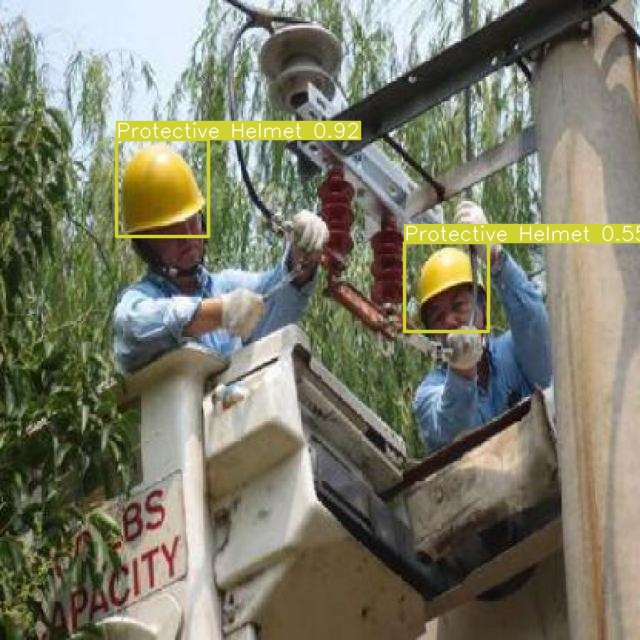

In [ ]:
from IPython.display import Image
Image(filename='runs/detect/predict/image1.jpg')


In [ ]:
!gdown "https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t
To: /content/yolov10/image2.jpg
100% 77.7k/77.7k [00:00<00:00, 73.1MB/s]


In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True model='best.pt' source='image2.jpg'

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2697146 parameters, 0 gradients, 8.2 GFLOPs

image 1/1 /content/yolov10/image2.jpg: 640x640 4 Protective Bootss, 3 Protective Helmets, 5 Safety Vests, 14.7ms
Speed: 2.8ms preprocess, 14.7ms inference, 171.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/yolov10/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


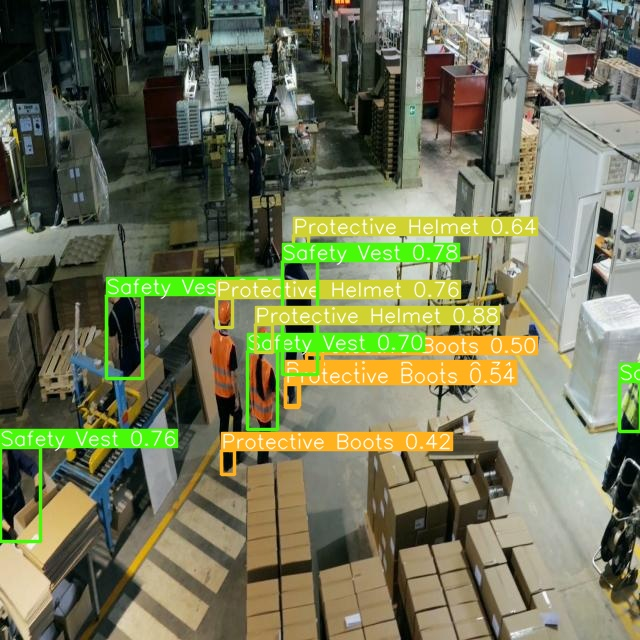

In [ ]:
from IPython.display import Image
Image(filename='runs/detect/predict2/image2.jpg')


#**Step 10: Inference on Video**

In [ ]:
!yolo task=detect mode=track conf=0.3 save=True model='/content/drive/MyDrive/train augment/weights/best.pt' source='/content/drive/MyDrive/newest dataset/VIDEO_DOWNLOAD_1733574734635_1733818775073.mp4'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
requirements: 

#**Display the Output Video**

In [ ]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/yolov10/yolov10/runs/detect/track/VIDEO_DOWNLOAD_1733574734635_1733818775073.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!yolo task=detect mode=predict conf=0.5 save=True model='Fish best.pt' source='eel.mp4'

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 5, in <module>
    from ultralytics.cfg import entrypoint
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/__init__.py", line 5, in <module>
    from ultralytics.data.explorer.explorer import Explorer
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/__init__.py", line 3, in <module>
    from .base import BaseDataset
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/base.py", line 17, in <module>
    from ultralytics.utils import DEFAULT_CFG, LOCAL_RANK, LOGGER, NUM_THREADS, TQDM
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/utils/__init__.py", line 1041, in <module>
    set_sentry()
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/utils/__init__.py", line 890, in set_sentry
    import sentry_sdk  # noqa
  File "/usr/local/lib/python3.10/dist-packages/sentry_sdk/__init__.py", line 1, in <module>
    from sentry_sdk.scope import Scope
  File "/usr/local

In [ ]:
!rm '/content/result_compressed.mp4'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = 'runs/detect/predict2/fish2.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.